# Testing Beamshape Package

Import Things

In [2]:
import imageio.v3 as iio
import laserbeamsize as lbs
import numpy as np

import matplotlib.pyplot as plt

Folder where images are stored 

In [3]:
repo = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/'

Pixel size - from auto calibration in ImageJ

In [4]:
pixel_size_µm = 1 / 2.8704

Going to try and replicate beam waist fit using this package!

In [5]:
# array of distances at which images were collected
z1 = np.array([20.8, 19.2, 17.6, 16,  14.4, 12.8, 11.2,  9.6,  8,   6.4,  4.8,  3.2,  1.6,  0, -1.6, -3.2, -4.8 ,-6.4, -8, -9.6],dtype=float) # um

# array of filenames associated with each image
fn1 = [repo + "%dum.pgm" % number for number in z1]
print(fn1)

['C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/20um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/19um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/17um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/16um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/14um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/12um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Bac

(250.0, 450.0)

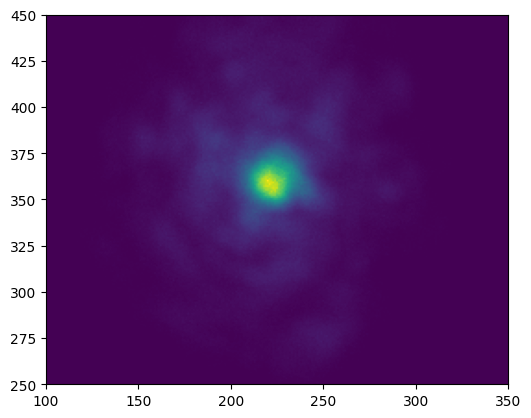

In [20]:
im1 = iio.imread(fn1[-1])
plt.imshow(im1)
plt.xlim(100,350)
plt.ylim(250,450)
plt

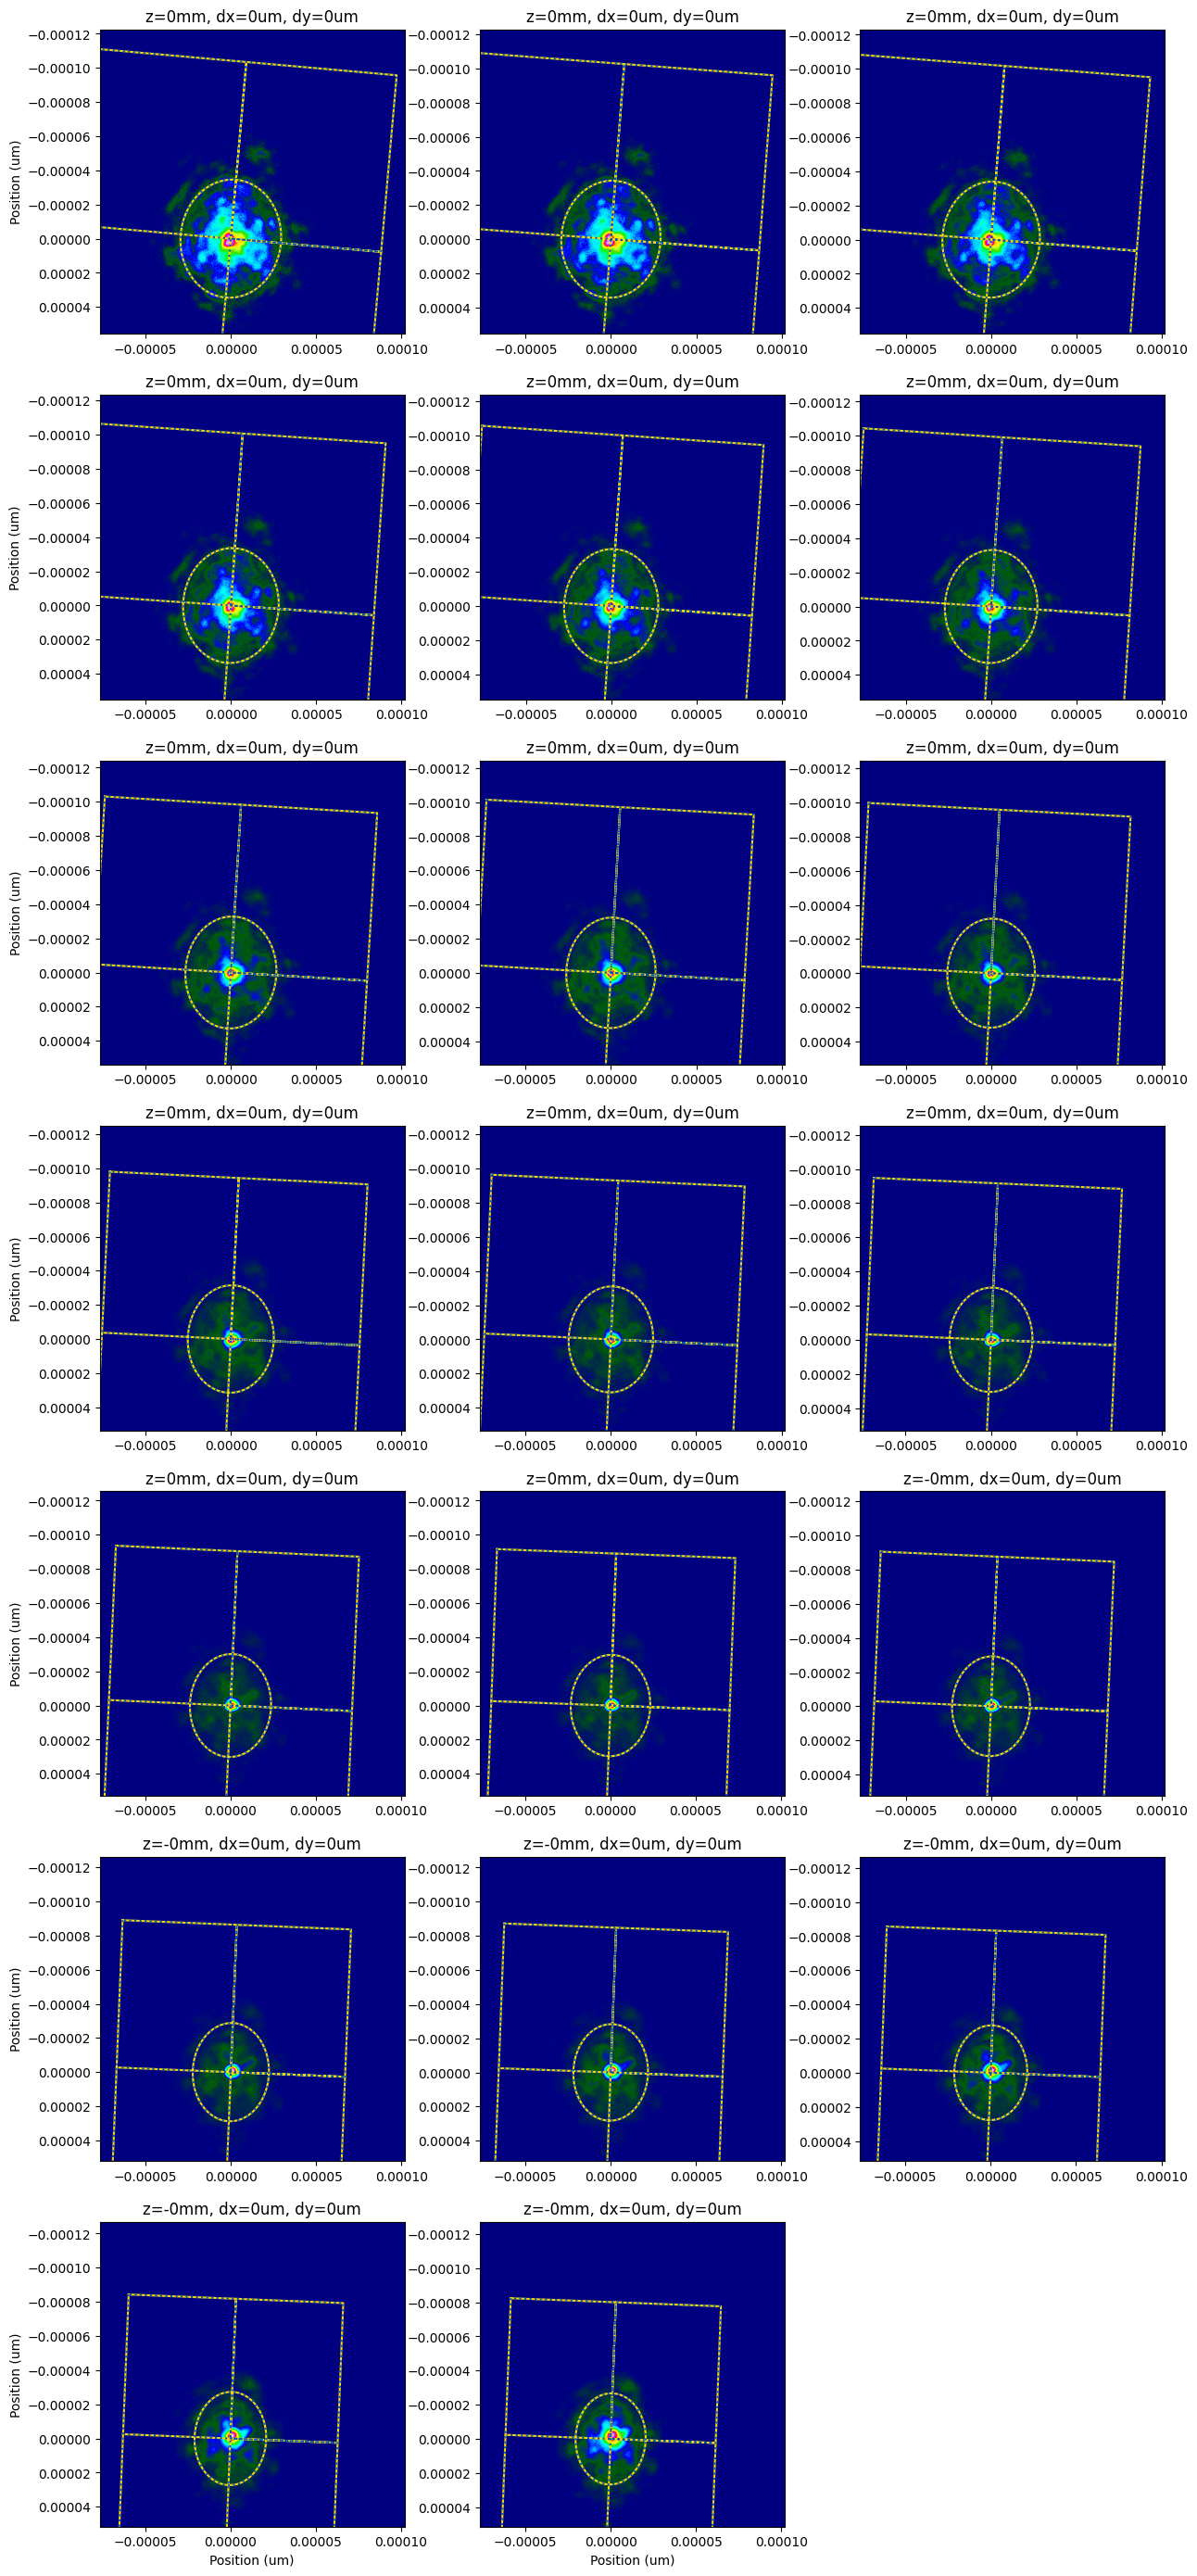

In [ ]:
# read them all into memory
test_img = [iio.imread(fn) for fn in fn1]
dx,dy=lbs.plot_image_montage(test_img, z=z1*1e-6, pixel_size=pixel_size_µm*1e-6, units='um', iso_noise=False)
plt.show()

rx = dx/2
ry = dy/2

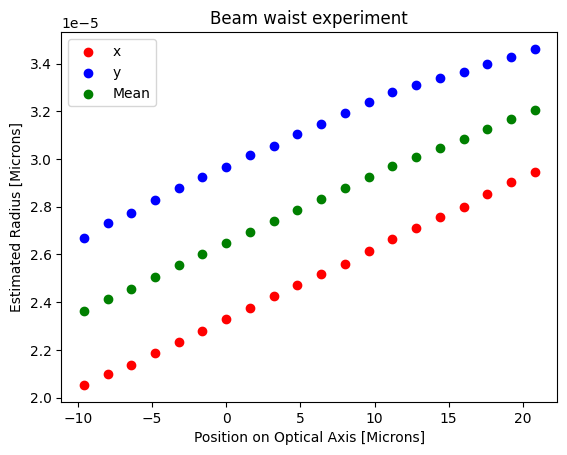

In [ ]:
plt.scatter(z1, rx, color='red', label='x')
plt.scatter(z1, ry, color='blue', label='y')
plt.scatter(z1, np.mean((rx,ry), axis = 0), color='green', label='Mean')

plt.xlabel('Position on Optical Axis [Microns]')
plt.ylabel('Estimated Radius [Microns]')
plt.title("Beam waist experiment")
plt.legend()
plt.show()